In [1]:
import xarray
import cartopy.feature as feature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

In [2]:
ssp_med1_slice = xarray.open_mfdataset('/archive/wfc/SPEAR/SPEAR_c192_o1_Hist_AllForc_IC1921_K50_ens_01_03/pp_ens_01/atmos_daily/ts/daily/10yr/atmos_daily.20010101-20101231.slp.nc')['slp'].sel(lat = slice(10,53), lon = slice(260, 323))
ssp_med2_slice = xarray.open_mfdataset('/archive/wfc/SPEAR/SPEAR_c192_o1_Hist_AllForc_IC1921_K50_ens_01_03/pp_ens_02/atmos_daily/ts/daily/10yr/atmos_daily.20010101-20101231.slp.nc')['slp'].sel(lat = slice(10,53), lon = slice(260, 323))
ssp_med3_slice = xarray.open_mfdataset('/archive/wfc/SPEAR/SPEAR_c192_o1_Hist_AllForc_IC1921_K50_ens_01_03/pp_ens_03/atmos_daily/ts/daily/10yr/atmos_daily.20010101-20101231.slp.nc')['slp'].sel(lat = slice(10,53), lon = slice(260, 323))
ssp_med4_slice = xarray.open_mfdataset('/archive/wfc/SPEAR/SPEAR_c192_o1_Hist_AllForc_IC1921_K50_ens_04_06/pp_ens_01/atmos_daily/ts/daily/10yr/atmos_daily.20010101-20101231.slp.nc')['slp'].sel(lat = slice(10,53), lon = slice(260, 323))
ssp_med5_slice = xarray.open_mfdataset('/archive/wfc/SPEAR/SPEAR_c192_o1_Hist_AllForc_IC1921_K50_ens_04_06/pp_ens_02/atmos_daily/ts/daily/10yr/atmos_daily.20010101-20101231.slp.nc')['slp'].sel(lat = slice(10,53), lon = slice(260, 323))

ssp_low1_slice = xarray.open_mfdataset('/archive/wfc/SPEAR/SPEAR_c96_o1_Hist_AllForc_IC1851_K50_ens_01_05/pp_ens_01/atmos_daily/ts/daily/10yr/atmos_daily.20010101-20101231.slp.nc')['slp'].sel(lat = slice(10,53), lon = slice(260, 323))
ssp_low2_slice = xarray.open_mfdataset('/archive/wfc/SPEAR/SPEAR_c96_o1_Hist_AllForc_IC1851_K50_ens_01_05/pp_ens_02/atmos_daily/ts/daily/10yr/atmos_daily.20010101-20101231.slp.nc')['slp'].sel(lat = slice(10,53), lon = slice(260, 323))
ssp_low3_slice = xarray.open_mfdataset('/archive/wfc/SPEAR/SPEAR_c96_o1_Hist_AllForc_IC1851_K50_ens_01_05/pp_ens_03/atmos_daily/ts/daily/10yr/atmos_daily.20010101-20101231.slp.nc')['slp'].sel(lat = slice(10,53), lon = slice(260, 323))
ssp_low4_slice = xarray.open_mfdataset('/archive/wfc/SPEAR/SPEAR_c96_o1_Hist_AllForc_IC1851_K50_ens_01_05/pp_ens_04/atmos_daily/ts/daily/10yr/atmos_daily.20010101-20101231.slp.nc')['slp'].sel(lat = slice(10,53), lon = slice(260, 323))
ssp_low5_slice = xarray.open_mfdataset('/archive/wfc/SPEAR/SPEAR_c96_o1_Hist_AllForc_IC1851_K50_ens_01_05/pp_ens_05/atmos_daily/ts/daily/10yr/atmos_daily.20010101-20101231.slp.nc')['slp'].sel(lat = slice(10,53), lon = slice(260, 323))


In [3]:
ssp_low_all = xarray.concat([ssp_low1_slice, ssp_low2_slice, ssp_low3_slice, ssp_low4_slice, ssp_low5_slice], dim='time') 

In [4]:
ssp_med_all = xarray.concat([ssp_med1_slice, ssp_med2_slice, ssp_med3_slice, ssp_med4_slice, ssp_med5_slice], dim='time') 

In [5]:
ssp_low_mean = ssp_low_all.mean('time') 

In [6]:
ssp_med_mean = ssp_med_all.mean('time') 

In [7]:
ssp_anom_low_all = ssp_low_all - ssp_low_mean

In [8]:
ssp_anom_med_all = ssp_med_all - ssp_med_mean

In [9]:
ssp_anom_low_all_diff = ssp_anom_low_all.diff(dim='time') 

In [10]:
ssp_anom_med_all_diff = ssp_anom_med_all.diff(dim='time') 

In [13]:
ssp_anom_low_all

<xarray.DataArray 'slp' (time: 18260, lat: 43, lon: 50)> Size: 157MB
dask.array<sub, shape=(18260, 43, 50), dtype=float32, chunksize=(3652, 43, 50), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 344B 10.5 11.5 12.5 13.5 14.5 ... 49.5 50.5 51.5 52.5
  * lon      (lon) float64 400B 260.6 261.9 263.1 264.4 ... 319.4 320.6 321.9
  * time     (time) object 146kB 2001-01-01 12:00:00 ... 2010-12-31 12:00:00

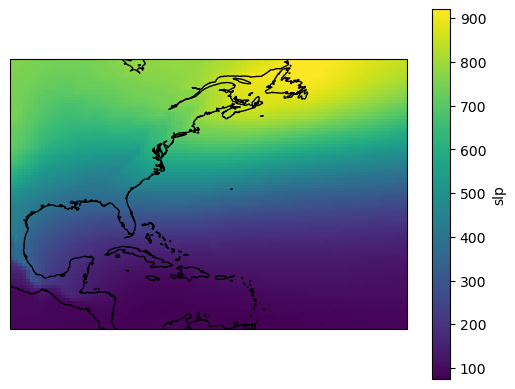

In [11]:
ax = plt.axes(projection=ccrs.PlateCarree())
ssp_anom_med_all_diff.std(dim='time').plot(ax=ax) 
ax.coastlines() 

KeyboardInterrupt: 

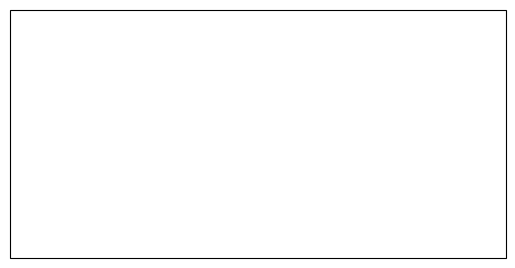

In [12]:
ax = plt.axes(projection=ccrs.PlateCarree())
ssp_anom_low_all_diff.std(dim='time').plot(ax=ax) 
ax.coastlines() 

In [17]:
ssp_anom_low_all = ssp_anom_low_all.chunk({'time': -1})
ssp_anom_med_all = ssp_anom_med_all.chunk({'time': -1}) 

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree()) 
ssp_anom_low_all.quantile(.999, dim='time').plot(ax=ax) 
ax.coastlines() 

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree()) 
ssp_anom_med_all.quantile(.999, dim='time').plot(ax=ax) 
ax.coastlines() 

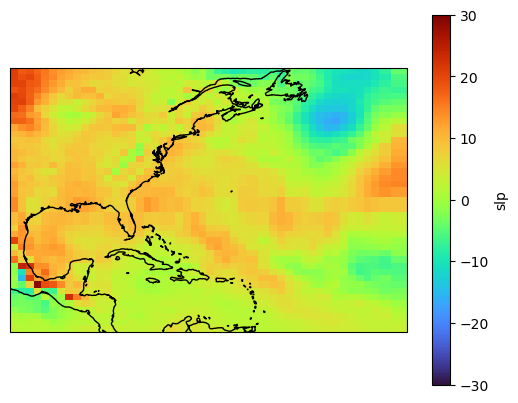

In [27]:
ax = plt.axes(projection=ccrs.PlateCarree()) 
coarsemed = (ssp_anom_med_all_diff.std(dim='time')).coarsen(lat=2, lon=2, boundary='trim').mean() 
diff = coarsemed - ssp_anom_low_all_diff.std(dim='time')
diff.plot(ax=ax, vmin=-30, vmax=30, cmap='turbo')
ax.coastlines() 

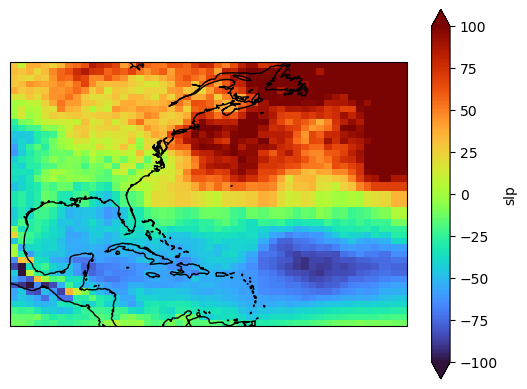

In [28]:
ax = plt.axes(projection=ccrs.PlateCarree()) 
coarsemed = (ssp_anom_med_all.quantile(.95, dim='time')- ssp_anom_med_all.quantile(.05, dim='time')).coarsen(lat=2, lon=2, boundary='trim').mean() 
diff = coarsemed - (ssp_anom_low_all.quantile(.95, dim='time')- ssp_anom_low_all.quantile(.05, dim='time'))
diff.plot(ax=ax, vmin=-100, vmax=100, cmap='turbo')
ax.coastlines() 

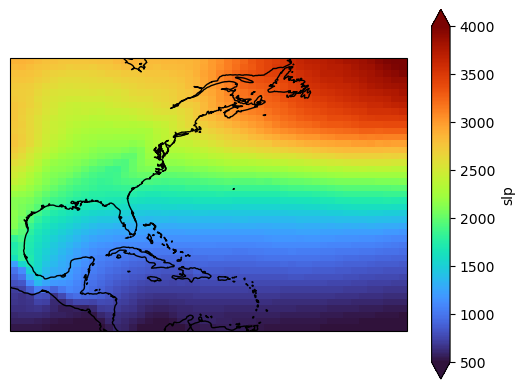

In [14]:
ax = plt.axes(projection=ccrs.PlateCarree()) 
(ssp_anom_low_all.quantile(.95, dim='time')- ssp_anom_low_all.quantile(.05, dim='time')).plot(ax=ax, vmin=500, vmax=4000, cmap='turbo')
ax.coastlines() 

In [21]:
plt.hist(ssp_low_all.values.flatten(), density=True, color ='red', bins = 5000, histtype='step' )
plt.hist(ssp_med_all.values.flatten(), density=True, color ='blue', bins = 5000, histtype='step')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none') 
plt.gca().spines['left'].set_color('none')
plt.gca().spines['bottom'].set_linewidth(2) 
plt.legend(loc = 'upper center', frameon=False, ncol=2)
plt.rcParams['figure.dpi'] = 1600

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
